# Análise Numérica 2020 - IMPA
# Aluno: Hallison Paz

-------

### Objective: Analyze linear systems of order 2 using the Gaussian Elimination Method with the aid of a computer program developed by each student.

## Instructions

### 3. Write a report describing your findings. Comment on the analytical solution, the numerical one and any important detail that you observed. Comments based on intuition without showing any supporting details, will be considered incomplete and it will cause loss points. Rigurosity and completeness will be expected all the time. Attach a copy of your code to this report.

*Este documento é o próprio relatório solicitado*. Neste formato, responderei aos dois exercícios propostos, adicionando minhas observações e conclusões no momento oportuno, juntamente com código e experimentos que suportem a análise.

----

### 1. In any computer language of your choice, implement a program that solves a 2x2 system of linear equations with real entries using Gaussian Elimination. Implement this using the most basic functions (not using functions that calculate inverse matrices, calculate determinants, etc.)
   
     1.1.  The program should receive 6 real numbers, to form a system of linear equation, i.e, 

 The elements of the matrix are represented by

 and

### Then calculate the solution, if any, of the given system.  Remember to include in your program the necessary tests to guarantee that the program does not have a catastrophic failure. Document your code as clear as possible. The process must be clear to anyone that reads your code. This will be evaluated.

----------

Neste exercício, utilizarei a linguagem de programação Python para implementar o programa requerido. Em Python, os números representados na forma ponto flutuante utilizam precisão dupla por padrão, uma representação que utiliza 64 bits de memória. A documentação da linguagem (https://docs.python.org/3/library/sys.html#sys.float_info) especifica que o valor épsilon - isto é, a mínima diferença computável entre a representação de dois números ponto flutuantes - pode ser obtido utilizando o módulo sys. 

In [1]:
import sys
sys.float_info.epsilon

2.220446049250313e-16

O resultado é similar ao que calculamos em aula utilizando o ambiente Matlab/Octave. De fato, podemos realizar o seguinte teste empírico:

In [2]:
# somar o épsilon causa uma mudança na representação
1 + sys.float_info.epsilon == 1

False

In [3]:
# somar um valor menor que o épsilon não muda a representação
1 + 1e-16 == 1

True

Uma das situações que queremos evitar em nosso programa é uma eventual divisão por zero no meio dos cálculos. Sabendo que a aritmética de números em ponto flutuante pode acumular erros naturais devido à representação finita dos números, realizar comparações diretas contra o número zero não é uma solução confiável. Conhecendo esta limitação e o valor épsilon do nosso ambiente de trabalho, podemos estabelecer uma forma de identificar se um valor deve ser considerado nulo a partir da comparação com este valor épsilon. 

Assim, vamos definir uma função auxiliar para esta tarefa:

In [4]:
def is_zero(n):
    return True if abs(n) < sys.float_info.epsilon else False

Agora, podemos implementar a solução de sistemas 2x2 por Eliminação Gaussiana com a seguinte função:

In [5]:
def solve_system(a11, a12, a21, a22, b1, b2):
    # divide each equation by the greatest coefficient
    h1 = max(a11, a12, b1)
    a11 /= h1
    a12 /= h1
    b1 /= h1

    h2 = max(a21, a22, b2)
    a21 /= h2
    a22 /= h2
    b2 /= h2
    # search for non zero element to the first position as we can't divide by zero
    if is_zero(a11): # first element is zero
        if not is_zero(a21):
            # exchange rows order
            a11, a21 = a21, a11 # python can exchange values without explicit auxiliary variable
            a12, a22 = a22, a12
            b1, b2, = b2, b1
        elif not is_zero(a12):
            # exchange columns order
            a11, a12 = a12, a11
            a21, a22 = a22, a21
        elif not is_zero(a22): # only a22 is not zero
            if is_zero(b1):
                print("Single valid equation; single solution")
                x = b2/a22
                return (x)
            else:
                print("System is impossible")
                return ("Inconsistent equation: {}X1 + {}X2 = {}".format(a21, a22, b2))
        else: # all elements of the matrix are equal zero
            print("Matrix values are null or too small for machine precision")
            return ()
        
    # coefficient to eliminate a21
    c = -a21/a11
    a21 += a11*c #a21 now is zero
    a22 += a12*c
    b2 += b1*c
    if is_zero(a22):
        if is_zero(b2):
            print("System with multiple solutions")
            return ("{}X1 + {}X2 = {}".format(a11, a12, b1))
        else:
            print("System is impossible")
            return ("Inconsistent equation: {}X1 + {}X2 = {}".format(a21, a22, b2))
    x2 = b2/a22
    #compute x1 using the value found for x2
    x1 = (b1 - a12*x2)/a11
    return (x1, x2)

Esta solução não é escalável, tendo sido concebida apenas para solucionar o caso 2x2 proposto.

O algoritmo implementado possui basicamente três etapas, que são melhor analisadas na ordem in versa em que aparecem. Uma etapa é o procedimento de Eliminação Gaussiana propriamente dito, em que calculamos o fator necessário para multiplicar a primeira linha de modo a eliminar (zerar) o primeiro elemento da segunda linha com a uma adição da primeira multiplicada por este fator.

Como não podemos dividir por zero, uma etapa anterior consiste em verificar se o primeiro elemento da primeira linha é diferente de zero; no nosso caso, se ele tem valor absoluto maior que o nosso épsilon de trabalho. Caso seja diferente de zero, prosseguimos normalmente; caso contrário, tentamos realizar, nesta ordem, uma troca de linhas, de colunas ou exibir uma resposta para o caso de sistemas indeterminados ou impossíveis.

Finalmente, a primeira etapa de todas consiste em um ajuste de escala no sistema. Esta etapa foi incluída após a discussão deste algoritmo em aula (03/04/2020), em que o professor Dan questionou se ele era capaz de resolver sistemas em que todos os valores envolvidos fossem extremamente pequenos, por exemplo: a11 = 1e-50, a12 = 0, a21 = 0, a22 = 1e-50, b1 = 1e-50, b2 = 1e-50. Sem essa etapa, valores extremamente pequenos, menores que o épsilon, eram considerados nulos e o algoritmo não dava uma solução adequada para o sistema. 

Após refletir sobre este problema, incluí uma etapa de divisão de cada equação por um fator igual ao maior coeficiente presente na equação. Para equações cuja ordem de grandeza dos valores seja próxima, essa etapa afasta os valores do risco de underflow (muito pequenos) ou overflow (muito grande).

In [6]:
# teste
solve_system(1e-50, 0, 0, 1e-50, 1e-50, 1e-50)

(1.0, 1.0)

--------

### 2.  Solve by hand and using your program the following systems and compare the two solutions:

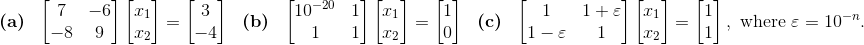

### For (c), use the program you implemented and test values of  17 <= n <= 22 and observe the systems behavior.

Resolvendo (a) com o programa, temos:

In [7]:
solve_system(7, -6, -8, 9, 3, -4)

(0.20000000000000004, -0.2666666666666666)

Agora, resolvendo na mão, temos:

system_a.jpg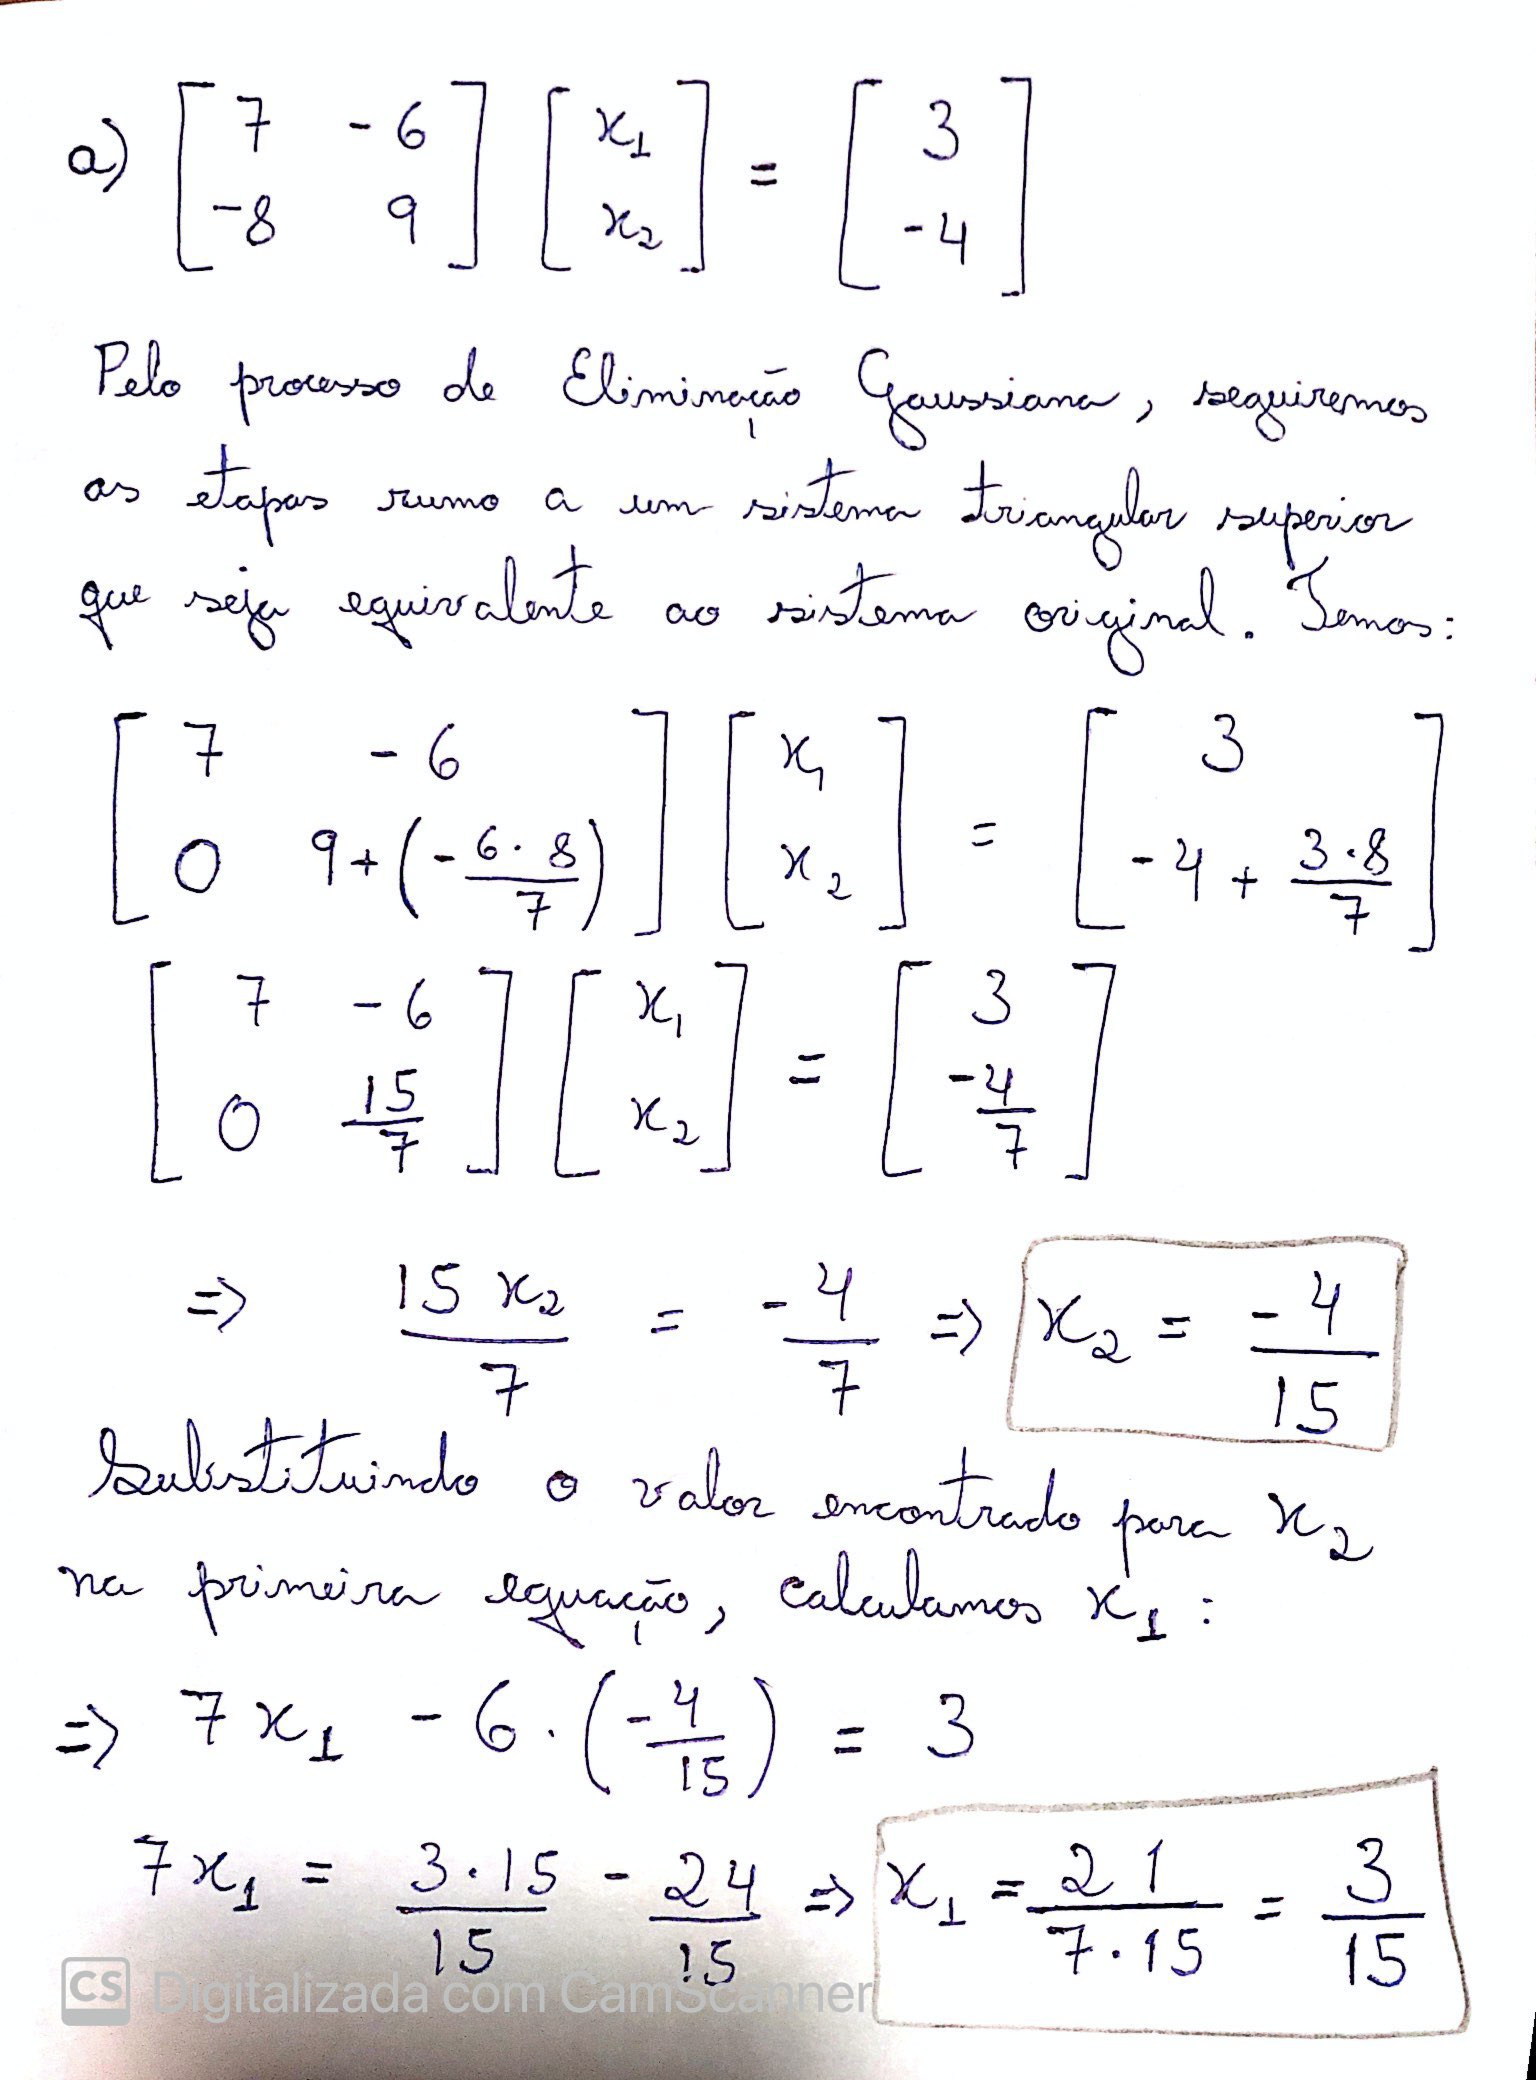

**Calculando os valores das frações da solução analítica, temos 0,2 e -0.2666666666666667**. A primeira solução é exata, enquanto a segunda é a aproximação de uma dízima periódica. 

Comparando com o resultado obtido da nossa solução numérica, temos que os valores são muito próximos do calculado. A aparente e pequena divergência entre 0,2 e 0.20000000000000004 pode ser justificada pela dificuldade inerente de se representar na base 10 números que estão codificados na base 2. Observe que a diferença entre essas duas representações ocorre na 16ª casa decimal e é inferior ao nosso épsilon de trabalho:

In [8]:
is_zero(0.2 - 0.20000000000000004)

True

-------

Resolvendo (b) com o programa, temos:

In [9]:
solve_system(1e-20, 1, 1, 1, 1, 0)

(-1.0, 1.0)

A princípio, esta pode parecer uma solução um pouco inesperada, devido ao valor 1e-20 em uma escala distante dos demais valores da matriz. Contudo substituindo os valores encontrados, podemos verificar que, numericamente, satisfazem às equações:

In [10]:
(1e-20)*(-1) + 1*1

1.0

In [11]:
1*(-1) + 1*1

0

O valor 1e-20 está em uma escala muito diferente dos demais valores da primeira equação, semdo muitas ordens de magnitude inferior. Deste modo, ficamos com um valor muito pequeno relativamente aos demais, inferior ao épsilon que estamos trabalhando e, portanto, constitui um incremento que não pode ser representado na aritmética entre os números em ponto flutuante. Assim, é como se fosse nulo. 

No programa apresentado acima, realizamos a verificação se o valor na posição **a11** da matriz é diferente de zero. Isto é necessário para evitar erros catastróficos como uma divisão por 0 (ou algo tão pequeno que tenha efeito semelhante na computação). Sendo o caso como nesse sistema, o algoritmo procura por outro valor não nulo disponível para substituir o representante da posição **a11**; primeiro na linha abaixo, depois na coluna ao lado.

Vamos realizar a solução analítica à mão:

system_b.jpg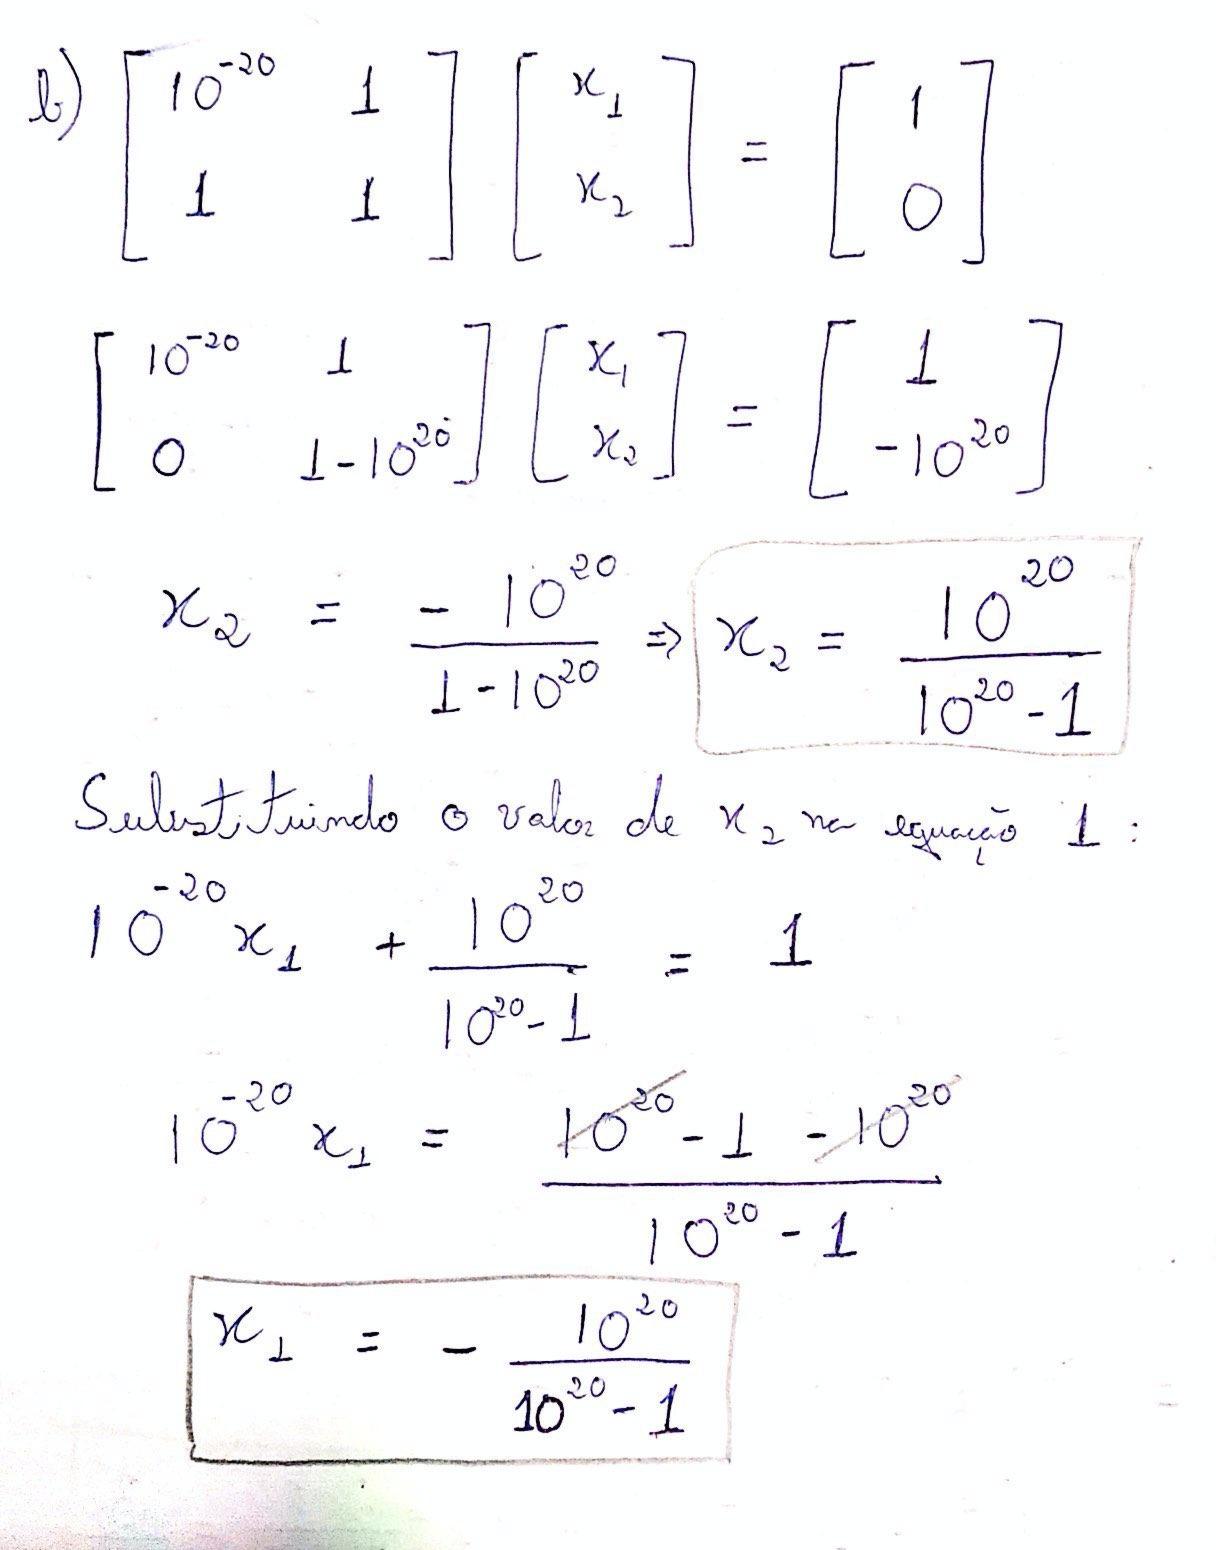

Analiticamente, não temos a limitação física dos computadores para representação de números, então podemos trabalhar com abstrações e representações de infinitos números. Como não há erro de arredondamento/truncamento, podemos seguir com a Eliminação Gaussiana na ordem natural em que o sistema é apresentado, embora a realização de uma troca de linhas talvez tivesse tornado a conta mais fácil.

Observamos que as soluções calculadas não são exatamente 1 e -1, porém são simétricos aditivos de valor absoluto muito próximo de 1. Outra forma de visualizar o valor absoluto desses números é dividindo o numerador e o denominador do resultado encontrado por 1e20, ficando com 1/(1 - 1e-20). Olhando dessa forma, é razoável pensar que o denominador (1 - 1e-20) é "praticamente" 1, embora não o seja dentro do conjunto dos Reais.

Numericamente, é importante notar que se realizarmos a divisão expressa nas frações encontradas como solução do sistema em um computador, obteremos o resultado calculado pelo algoritmo para o sistema, uma vez que a diferença 1e-20 é inferior ao épsilon que estamos trabalhando:

In [12]:
1e20/(1e20-1)

1.0

In [13]:
-1e20/(1e20-1)

-1.0

-------

Por último, vamos solucionar o sistema (c). Primeiramente, apliquemos o programa implementado, conforme a orientação:

In [14]:
e = 1e-17
for i in range(22-17+1):
    x = solve_system(1, 1+e, 1-e, 1, 1, 1)
    print(x)
    e /= 10

System with multiple solutions
1.0X1 + 1.0X2 = 1.0
System with multiple solutions
1.0X1 + 1.0X2 = 1.0
System with multiple solutions
1.0X1 + 1.0X2 = 1.0
System with multiple solutions
1.0X1 + 1.0X2 = 1.0
System with multiple solutions
1.0X1 + 1.0X2 = 1.0
System with multiple solutions
1.0X1 + 1.0X2 = 1.0


O comportamento do sistema foi o mesmo para **n** no intervalo especificado. Contudo, é importante notar que todos os valores de **e** calculados a partir deste intervalo de **n** são inferiores ao nosso épsilon de trabalho. Assim, em relação às nossas soluções computacionais, todos estão em uma mesma classe de equivalência. 

Analiticamente, temos:

system_c.jpg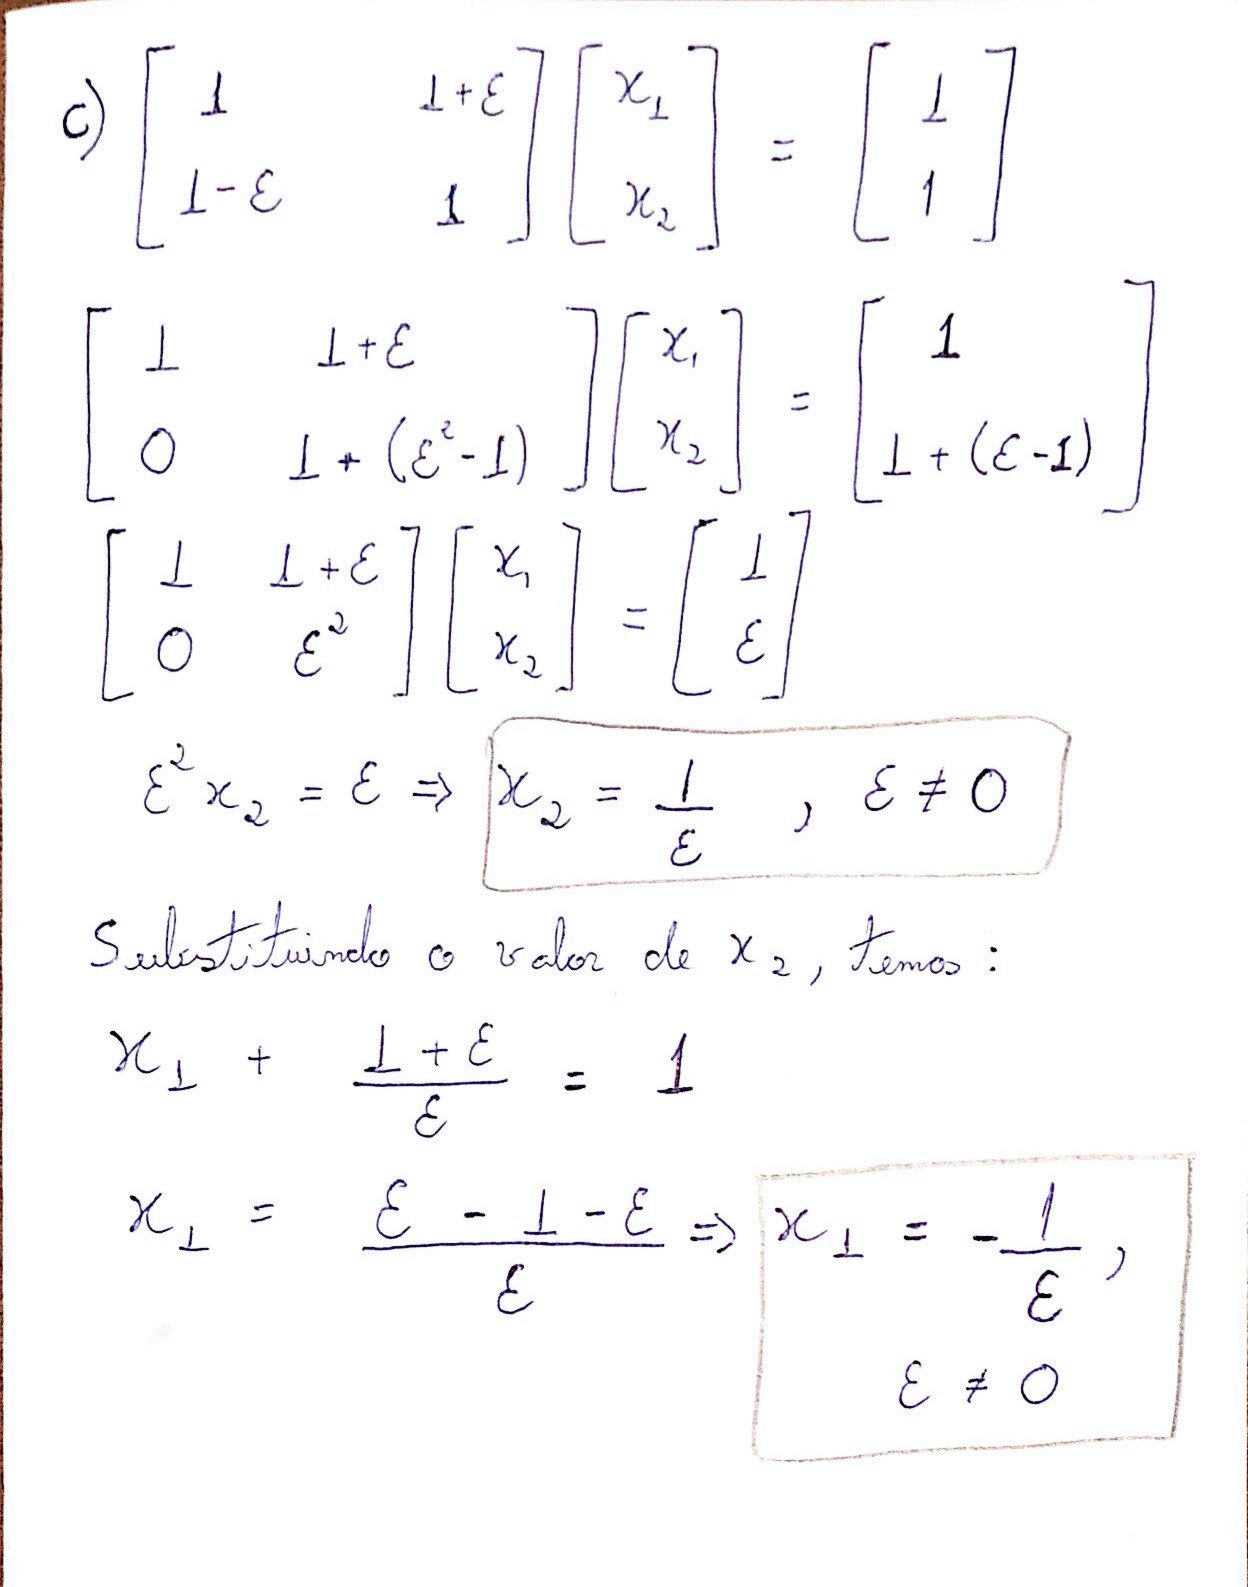

Olhando para a solução analítica, podemos pensar que a solução em si poderia ser representada numericamente. De fato, temos:

In [15]:
e = 1e-17
1/e

1e+17

In [16]:
-1/e

-1e+17

Contudo, o algoritmo considera que os valores **e**, **e^2** são muito pequenos e podem ser considerados nulos. Antes de realizar mais uma modificação no algoritmo para tentar abaercar esse caso, tentei solucionar esse mesmo sistema na ferramenta Octave, similar ao ambiente Matlab.

Capture d’écran 2020-04-03 à 23.12.51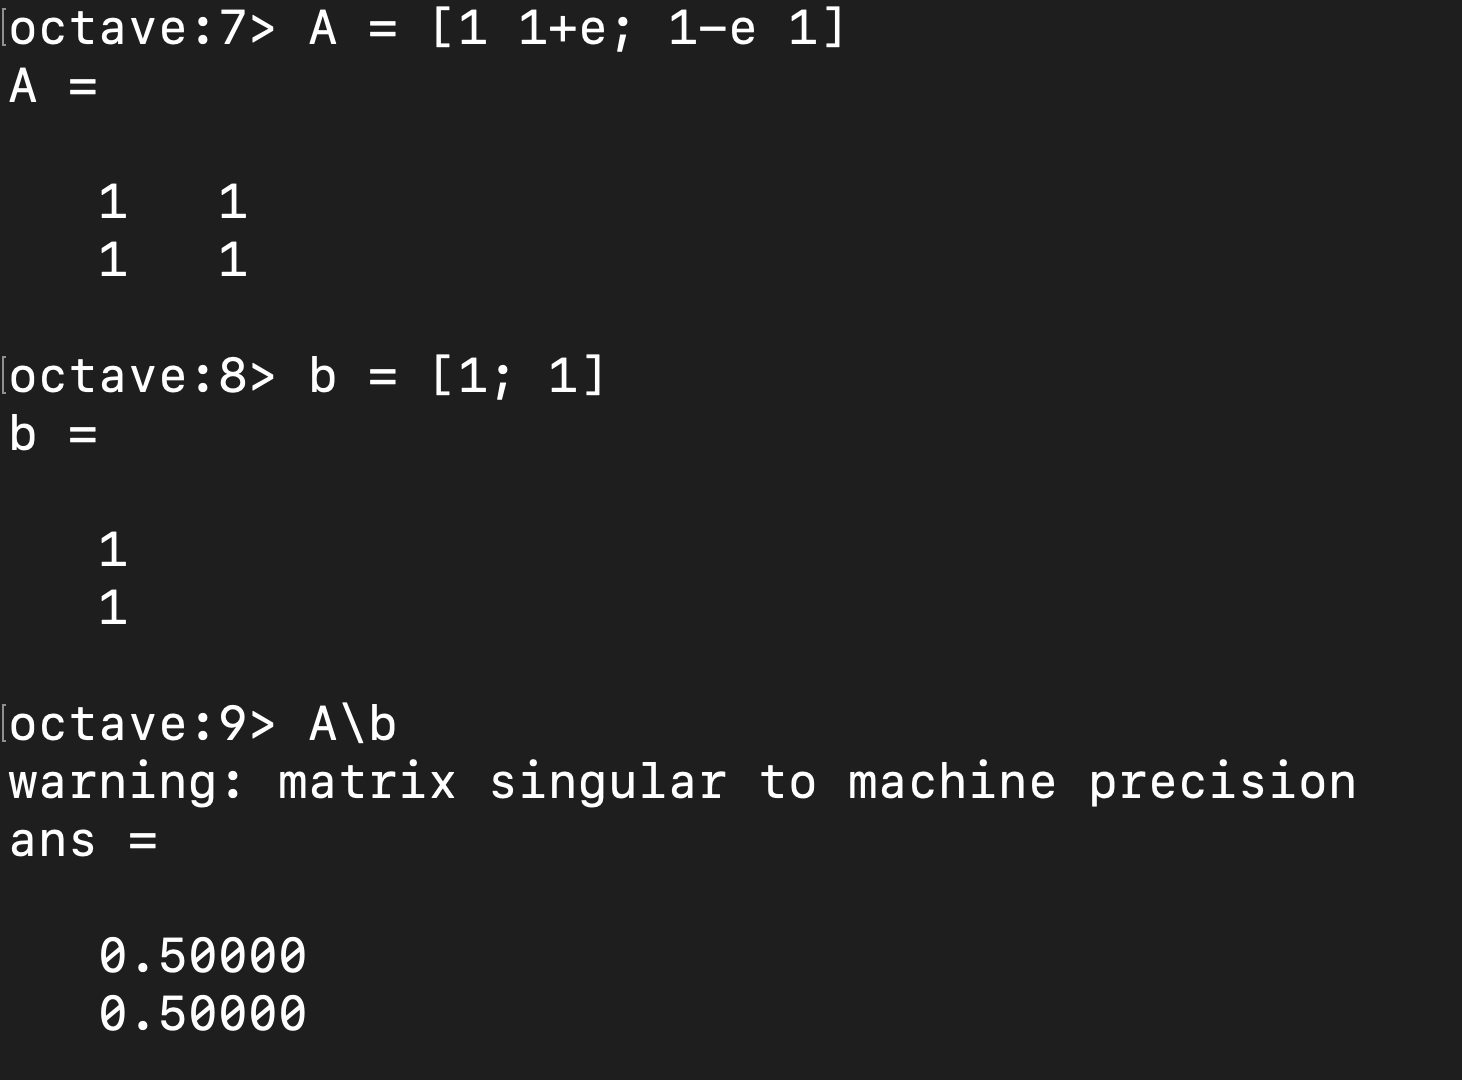

Aparentemente, o Octave também teve dificuldades em lidar com esse sistema, apresentando um aviso e uma solução que faz sentido se considerarmos que **e** não teve impacto sobre o sistema. Nesse caso, teríamos uma única equação **x1 + x2 = 1** com múltiplas soluções, sendo **(0.5, 0.5)** uma solução particular.

Tendo em vista esse experimento, me parece que este tipo de sistema é uma limitação da implementação numérica da Eliminação Gaussiana.